# DBSCAN - Density Based Spatial Clustering of Applications
---
DBSCAN is a clustering algorithm which defines clusters based on the dense regions in the space.
There are two important hyperparameter specifications:-
1. Epsilon- The radius of the area around the point defining the maximum distance.
2. Min points- The minimum number of points present in the neighbourhood required to form the cluster.

 Pros and Cons:
 Pros: 
 1)It works well to identify arbitrarily shaped  clusters
 2)Can identify outliners
 Cons: It does not work well wien there is varying density across the data since Epsilon and MinPts are fixed
$$s = (b-a)/max(a,b)$$

In [1]:
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

<frozen importlib._bootstrap>:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [4]:
df = pd.read_csv('../data/Real_estate.csv', encoding='utf-8')

In [6]:
fig = px.scatter_3d(df,x = df['X3 distance to the nearest MRT station'], y = df['X2 house age'], z = df['Y house price of unit area'],
                    opacity=1,color_discrete_sequence=['purple'])
fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

fig.update_traces(marker=dict(size=2))
fig.show() 

In [8]:
#Data preperation 
X = df[['X3 distance to the nearest MRT station', 'X2 house age', 'Y house price of unit area']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

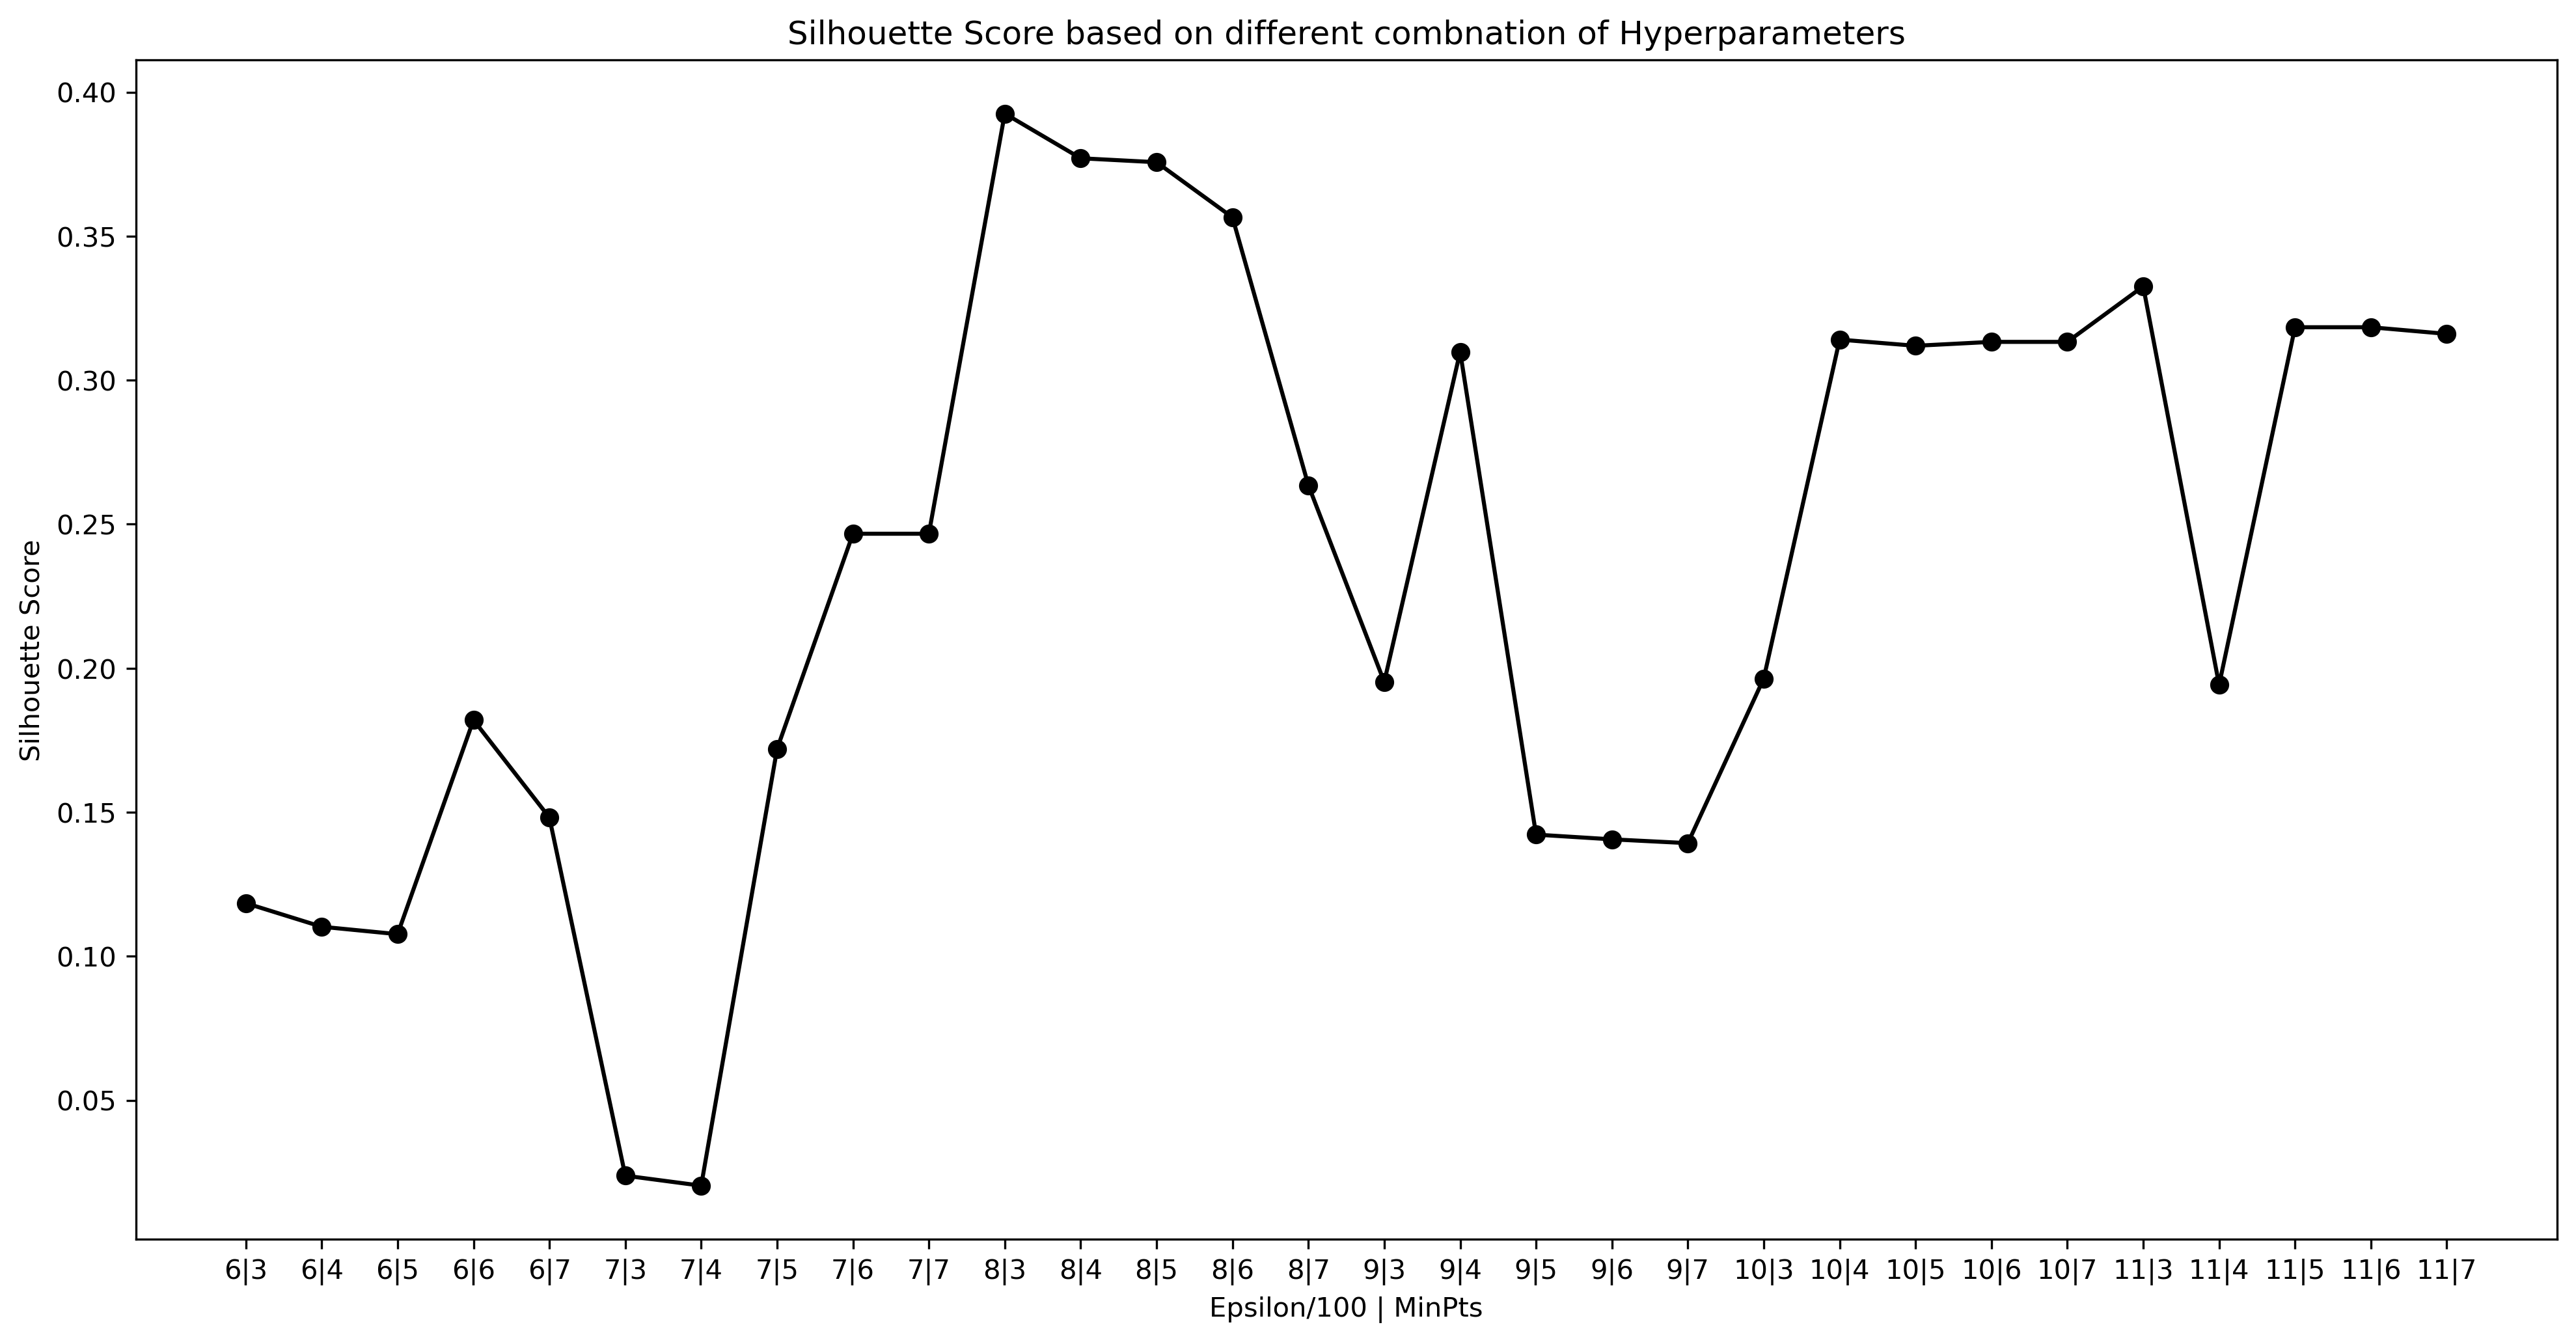

In [11]:
#CREATE EMPTY LISTS
S = []
comb = []

eps_range = range(6,12)
minpts_range = range(3,8)

for k in eps_range:
    for j in minpts_range:
        model = DBSCAN(eps = k/100, min_samples=j)
        clm = model.fit(X_scaled)
        S.append(metrics.silhouette_score(X_scaled, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j))

plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

In [12]:
model183 = DBSCAN(eps=0.08,
                min_samples=3,
                metric='euclidean',
                metric_params=None, 
               leaf_size=30,
               p=None, 
               n_jobs=None,
              )
model166 = DBSCAN(eps=0.06, min_samples=6)

clm83 = model183.fit(X_scaled)
clm66 = model166.fit(X_scaled)


print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(clm83.labels_)
print("Cluster labels for the second model")
print(clm66.labels_)

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[ 0  1  1  1  1  1  0  1 -1  1  0  1  1  1  1  0  1  1  1  1  1  1  1  1
  0  0  1  1  1  1  2  0  0  1  1  3  1  1  1  1  3  3  0  0  1  0  1 -1
  2  2  1  0  0  1  1  0  0  1 -1  1  1  1  1  1  1  0  1  1  0  1  1  0
  0  3  1  1  0  1  0  1  1  0  1 -1  1  1  1  3  1 -1  1  1  1  0  0  1
  1  0  1  1  1  1  1  1  0  1  1  1  0  1  1  0  1 -1  0  1 -1  3 -1  1
  1  1  0  1  1  1 -1  1  4  0  0  1  0  1  0  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  0  0  1  1  1  3  3  0  1  1  1  1  1  3  1  1  1  1  0
  0  1  2  1  1  0  1  0  3  0  1  1  2  1  1  3  1  0  1 -1  0  3  0  1
  0  1  3  1  1  0  0  1  1  1  0  1  1  1  1  0  1  0  1  1  1  1  1  1
  0  0  1  0 -1  1  0  1  0  1  3  0 -1  0  1  3  2  0  1  1  1  1  1  1
  1  1  1  0  1  1  1  1  1 -1  0  0  1  0  1 -1  1  1  1  1  1  1  1  1
  0  1  1  0  1  1 -1  1  1  1  0  1  1  1  1  1  1  1  1  0  1  0  1  1
  1  1  0  1  1  1  0  1  1  0  3

### -1 here is defined as outliners

In [13]:
df['DBSCAN Clusters 83']=clm83.labels_
df['DBSCAN Clusters 66']=clm66.labels_
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,DBSCAN Clusters 83,DBSCAN Clusters 66
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,0,0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1,1
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1,1
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1,1
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1,1
...,...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,3,4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,1,1
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,1,1
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,1,1


In [14]:
df=df.sort_values(by=['DBSCAN Clusters 83'])

fig = px.scatter_3d(df, x=df['X3 distance to the nearest MRT station'], y=df['X2 house age'], z=df['Y house price of unit area'], 
                    opacity=1, color=df['DBSCAN Clusters 83'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    hover_data=['X5 latitude', 'X6 longitude'],
                    width=900, height=900
                   )

fig.update_layout(
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

fig.update_traces(marker=dict(size=2))

fig.show()